# **Connect To google drive (GD)**

In [ ]:
#Connection to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Libraries**

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import norm
import statistics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import pickle
%matplotlib inline

# **Helper Functions**

`visualize_gaussian_distribution(column_name:str)`is function to help us to visualize the distrbution of the column, It takes a column name that you want to visualize  

In [ ]:
def visualize_gaussian_distribution(column_name:str):
  pinterval=train_dataset[column_name].max()
  ninterval=train_dataset[column_name].min()
  # Calculating mean and Stdev
  df_mean = np.mean(train_dataset[column_name])
  df_std = np.std(train_dataset[column_name])

  # Calculating probability density function (PDF)
  pdf = stats.norm.pdf(train_dataset[column_name].sort_values(), df_mean, df_std)

  # Drawing a graph
  plt.plot(train_dataset[column_name].sort_values(), pdf)
  plt.xlim([ninterval,pinterval])
  plt.xlabel(f"{column_name}", size=12)
  plt.ylabel("Frequency", size=12)
  plt.grid(True, alpha=0.3, linestyle="--")
  plt.show()



`skew_value(column_name:str)` is function to help you to know, if there is skewness and the skew value.

In [ ]:
def skew_value(column_name:str):
  skewness = train_dataset[column_name].skew()
  print(f"Skewness of {column_name} is {skewness}")

In [ ]:
def FeatureScalling(X):
  for column in X.columns:
    X[column] = (X[column] - X[column].min()) /(X[column].max() - X[column].min())
  return X

In [ ]:
def cat_boost(X_train,y_train,X_test,y_test):
  cat_clf = CatBoostClassifier()
  cat_clf.fit(X_train,y_train)
  preds = cat_clf.predict(X_test)
  print('Accuracy :', metrics.accuracy_score(y_test, preds))
  return cat_clf,preds

In [ ]:
def random_forest(X_train,y_train,X_test,y_test):
  rf = RandomForestClassifier()
  rf.fit(X_train,y_train)
  preds = rf.predict(X_test)
  print('Accuracy :', metrics.accuracy_score(y_test, preds))
  return rf,preds

# **Load Data**

Path of the folder of the dataset

In [ ]:
Path_Of_The_Folder='/content/drive/MyDrive/Device_Price_Prediction_Dataset'

To Load the train dataset

In [ ]:
train_dataset=pd.read_csv(Path_Of_The_Folder+'/Train.csv')

To Load the test dataset

In [ ]:
test_dataset=pd.read_csv(Path_Of_The_Folder+'/Test.csv')

# **Data preparing**

To show the first five rows and the columns of the train dataset, we use `head()` function.

In [ ]:
train_dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


To Know the number of rows and number of columns (Shape of the dataset)

In [ ]:
num_rows, num_columns = train_dataset.shape
print(f"Number of rows is {num_rows} and Number of columns is {num_columns}")

Number of rows is 2000 and Number of columns is 21


To show some information about the data, like to see how many nulls and how many non-null
we can also show the data type of each column

In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

The `describe()` method in Pandas is extremely useful for getting
a quick overview of the statistical summary of numerical columns in your DataFrame.
It provides several key statistics that help in understanding the distribution and characteristics of the data.

In [ ]:
train_dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


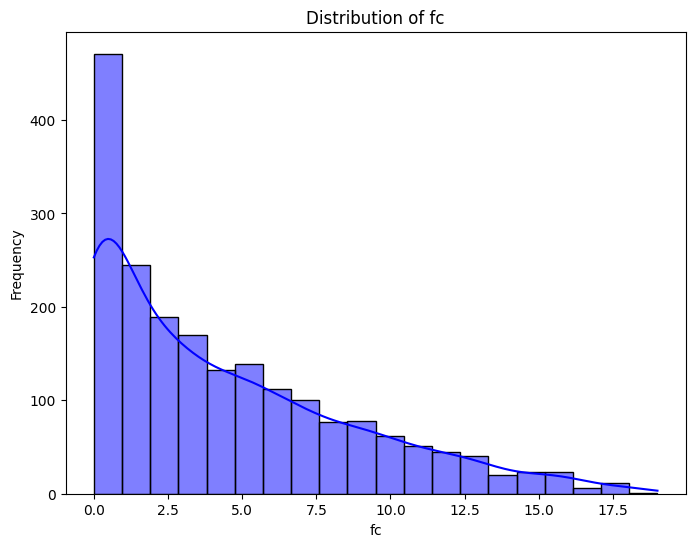

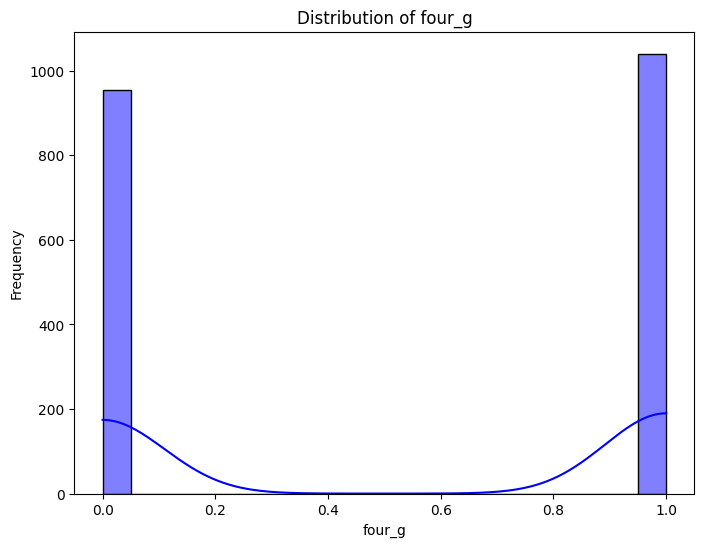

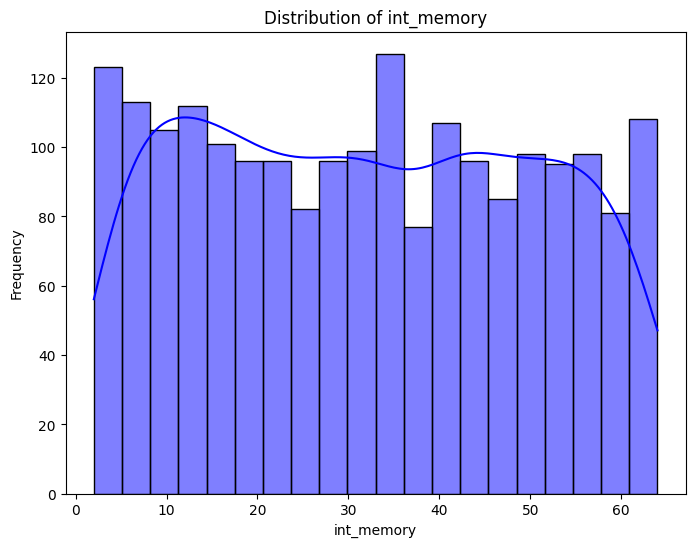

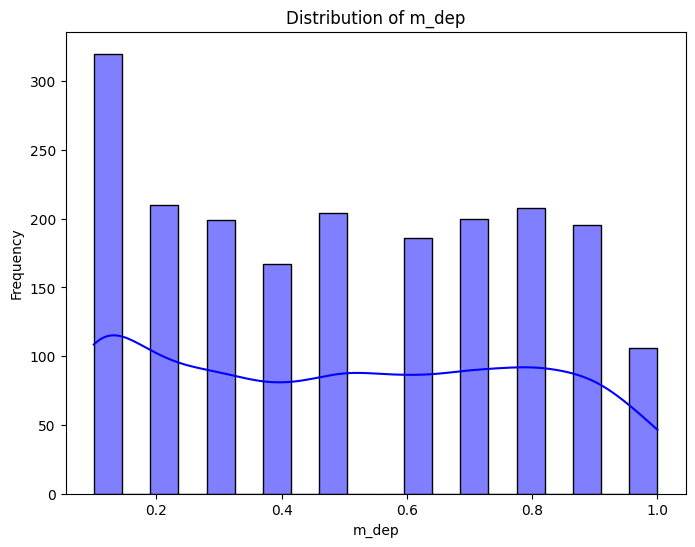

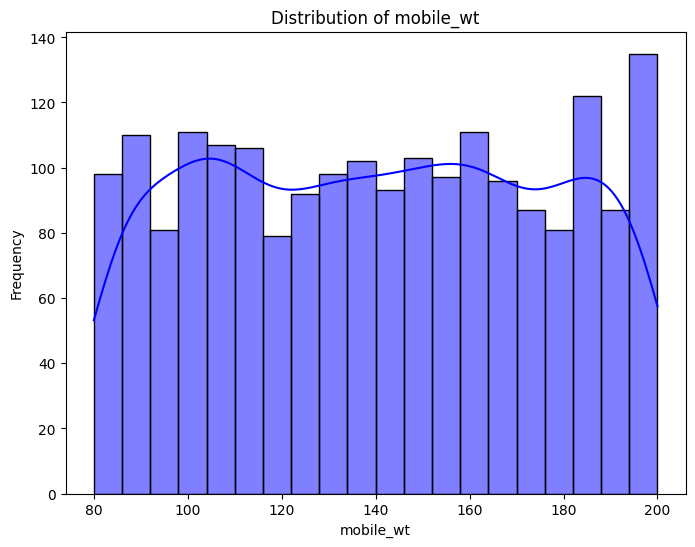

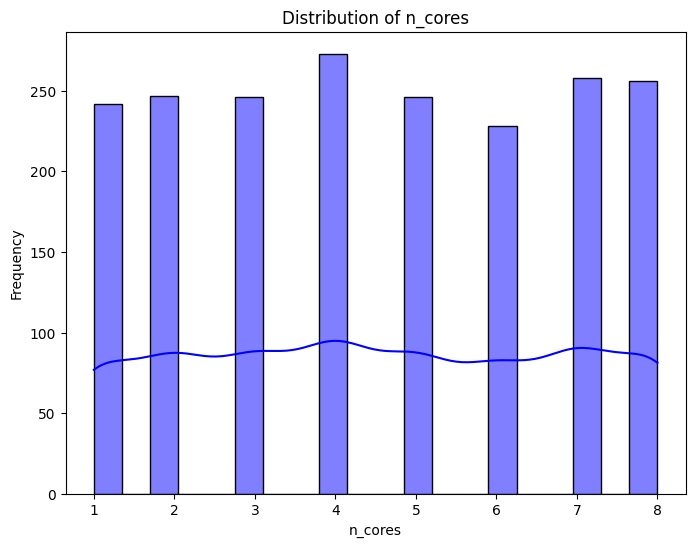

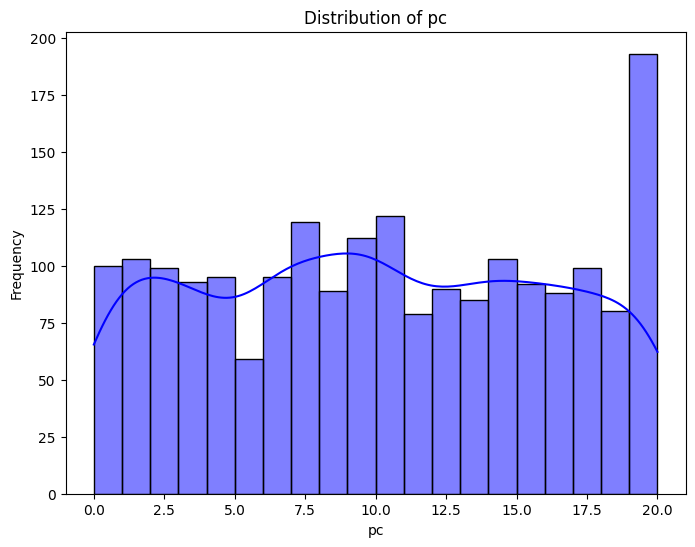

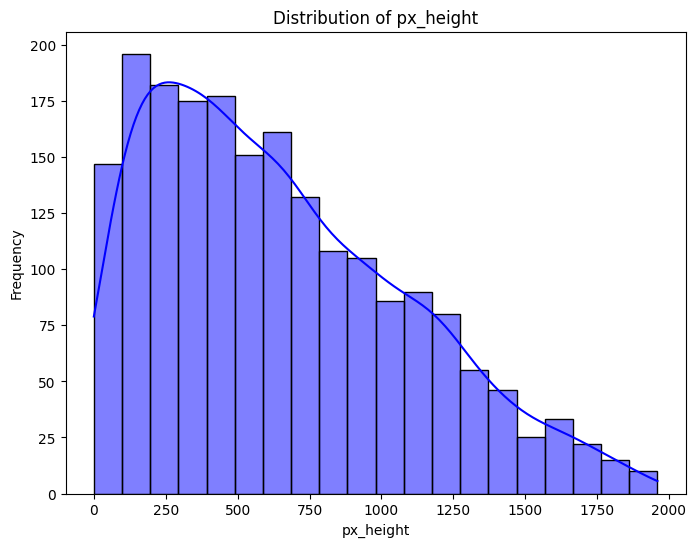

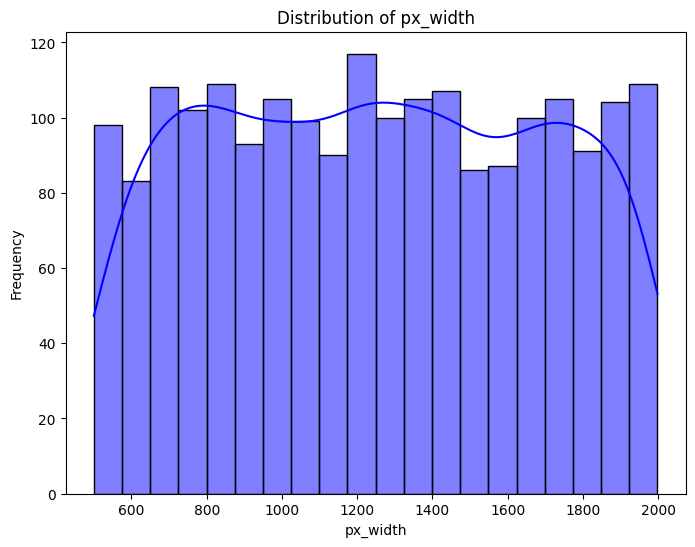

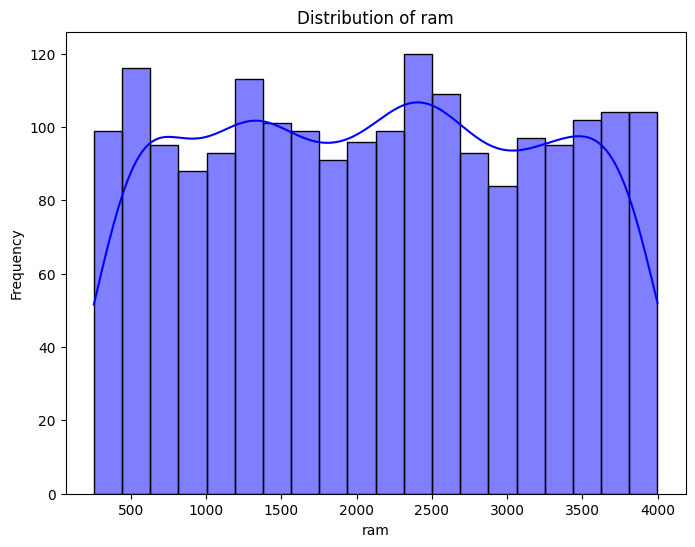

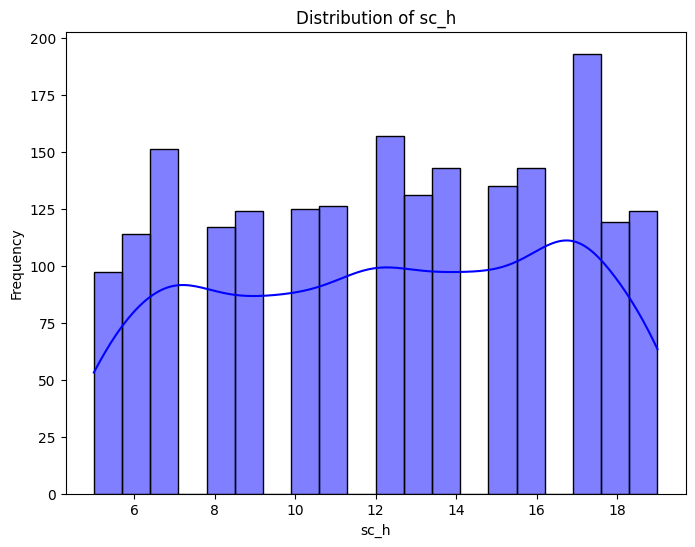

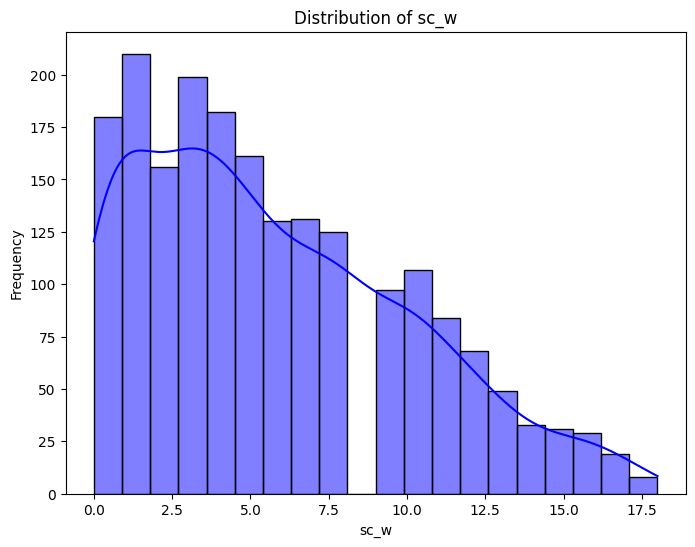

In [ ]:
# Plot histograms for columns with null values
columns_with_nulls = ['fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w']
for column in columns_with_nulls:
    plt.figure(figsize=(8, 6))
    sns.histplot(train_dataset[column].dropna(), bins=20, kde=True, color='blue', label='Histogram', alpha=0.5)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


As we see from the information and description of the data, that there are null values but there are little, so we can fill those nulls with the mean of the column, and in columns that contains zero or one we can fill those nulls with the mode of the column

In [ ]:
# Fill null values with mean for columns with normal distribution
train_dataset['int_memory'].fillna(train_dataset['int_memory'].mean(), inplace=True)
train_dataset['m_dep'].fillna(train_dataset['m_dep'].mean(), inplace=True)
train_dataset['n_cores'].fillna(train_dataset['n_cores'].mean(), inplace=True)
train_dataset['pc'].fillna(train_dataset['pc'].mean(), inplace=True)
train_dataset['px_height'].fillna(train_dataset['px_height'].mean(), inplace=True)
train_dataset['px_width'].fillna(train_dataset['px_width'].mean(), inplace=True)
train_dataset['ram'].fillna(train_dataset['ram'].mean(), inplace=True)
train_dataset['sc_h'].fillna(train_dataset['sc_h'].mean(), inplace=True)
train_dataset['sc_w'].fillna(train_dataset['sc_w'].mean(), inplace=True)


train_dataset['fc'].fillna(train_dataset['fc'].mean(), inplace=True)
train_dataset['mobile_wt'].fillna(train_dataset['mobile_wt'].mean(), inplace=True)

# Fill null values with mode for binary.
train_dataset['four_g'].fillna(train_dataset['four_g'].mode()[0], inplace=True)


In [ ]:
# Plot histograms for columns with null values
columns_with_nulls = ['fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w']
for column in columns_with_nulls:
    plt.figure(figsize=(8, 6))
    sns.histplot(train_dataset[column].dropna(), bins=20, kde=True, color='blue', label='Histogram', alpha=0.5)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


Using `visualize_gaussian_distribution(column_name:str)` Function to see the distribution of the data before nulls and after nulls but There is not a big difference between them cause there are little nulls.


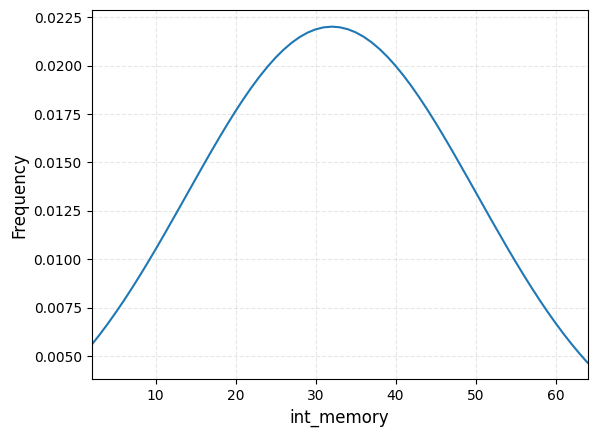

In [ ]:
visualize_gaussian_distribution('int_memory')

Using `skew_value(column_name:str)` function to see the skewenss of the column and the skew value

In [ ]:
skew_value('int_memory')

Skewness of int_memory is 0.05730275280411043


In [ ]:

from scipy.stats import norm
import statistics

# Assuming x_axis is the numerical values from the 'int_memory' column
x_axis = np.arange(train_dataset['fc'].dropna)

# Calculate mean and standard deviation
mean = np.mean(x_axis)
sd = np.std(x_axis)

# Plot normal distribution curve
plt.figure(figsize=(8, 6))
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
'''
plt.title('Normal Distribution of fc')
plt.xlabel('fc')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
'''
plt.show()


TypeError: unsupported operand type(s) for -: 'method' and 'int'

Skewness of 'int_memory' column: 1.0187666110548288


In [ ]:
import scipy.stats as stats

# Plot histograms for numerical columns with fitted normal distribution curve
numerical_columns = train_dataset.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))

    # Plot histogram
    sns.histplot(train_dataset[column], bins=20, kde=True, color='blue', label='Histogram', alpha=0.5)

    # Fit normal distribution curve
    mu, sigma = train_dataset[column].mean(), train_dataset[column].std()
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    fitted_normal = stats.norm.pdf(x, mu, sigma)

    # Plot fitted normal distribution curve
    plt.plot(x, fitted_normal, 'r-', label='Fitted Normal Distribution')

    plt.title(f'Normal Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Probability Density')
    plt.legend()
    plt.show()


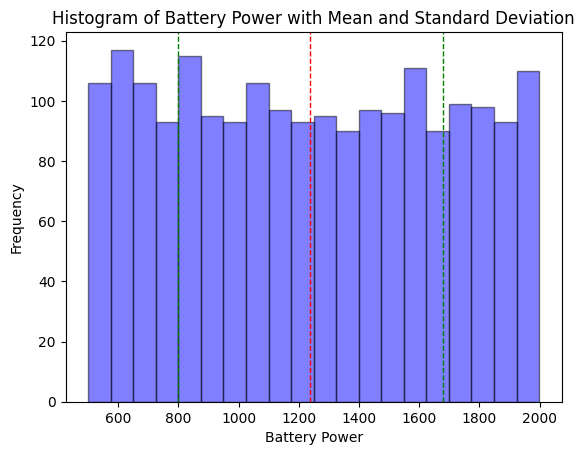

In [ ]:
# Plot histogram with mean and standard deviation lines for 'battery_power' column
plt.hist(train_dataset['battery_power'], bins=20, alpha=0.5, color='blue', edgecolor='black')
plt.axvline(train_dataset['battery_power'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(train_dataset['battery_power'].mean() + train_dataset['battery_power'].std(), color='green', linestyle='dashed', linewidth=1)
plt.axvline(train_dataset['battery_power'].mean() - train_dataset['battery_power'].std(), color='green', linestyle='dashed', linewidth=1)
plt.title('Histogram of Battery Power with Mean and Standard Deviation')
plt.xlabel('Battery Power')
plt.ylabel('Frequency')
plt.show()


Calculate correlation matrix to see the corrleation between the target and other variables, After that we can make decision which variable is important and which variable we can drop

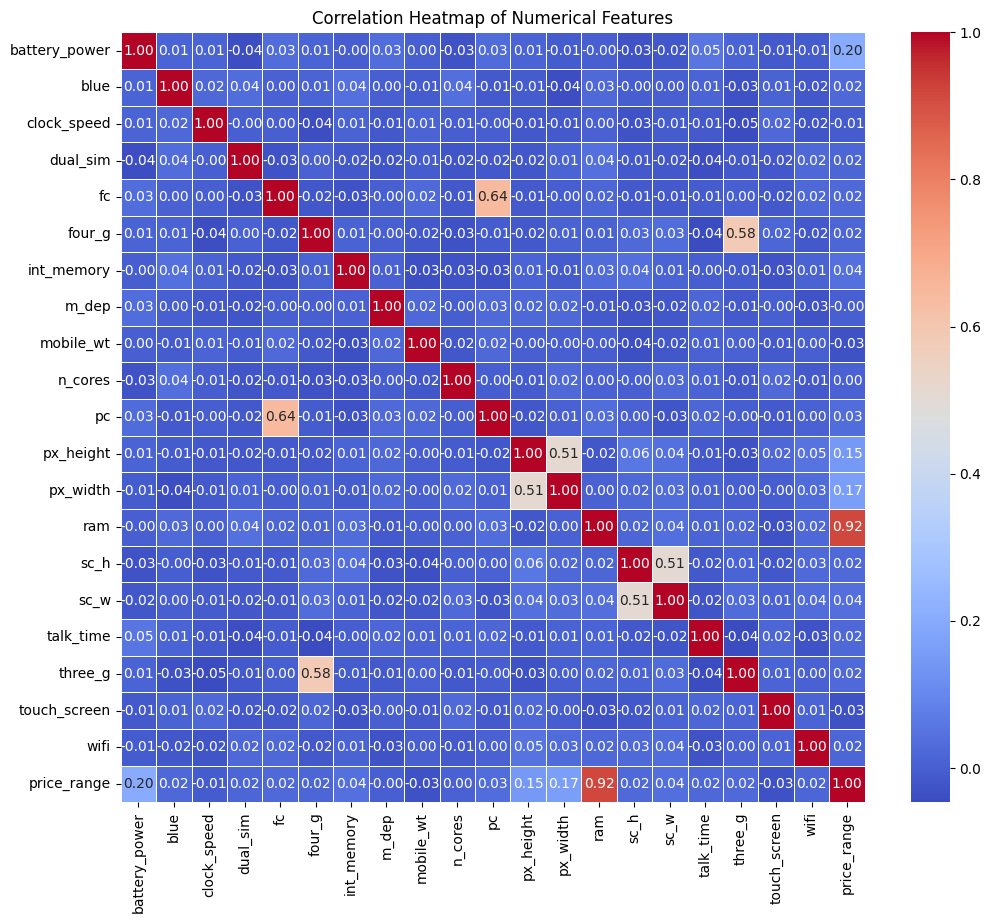

In [ ]:
# Calculate correlation matrix
correlation_matrix = train_dataset.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


After calculate the correlation matrix, now I will detect any variable less than 0.01, and drop it cause it will not be important

In [ ]:
prices=correlation_matrix['price_range'].index
columns_to_drop=[]
for price in prices:
  if ((abs(correlation_matrix['price_range'][price])>=0.01) == False):
    columns_to_drop.append(price)

print(f"Columns to drop is: {columns_to_drop}")

Columns to drop is: ['clock_speed', 'm_dep', 'n_cores']


Drop the columns that the value of its correlation less than 0.01

In [ ]:
# Drop the columns
train_dataset_filtered = train_dataset.drop(columns=columns_to_drop)



Show the new shape

In [ ]:
train_dataset_filtered.shape

(2000, 18)

In [ ]:
# Print the columns that were dropped
print("Columns with zero correlation with price_range that were dropped:")
print(columns_to_drop)

# Display the head of the filtered dataset
print("\nFiltered dataset after dropping columns:")
print(train_dataset_filtered.head())

To show the distrbution of RAM across different ranges, cause we see that the ram is the highest correlation

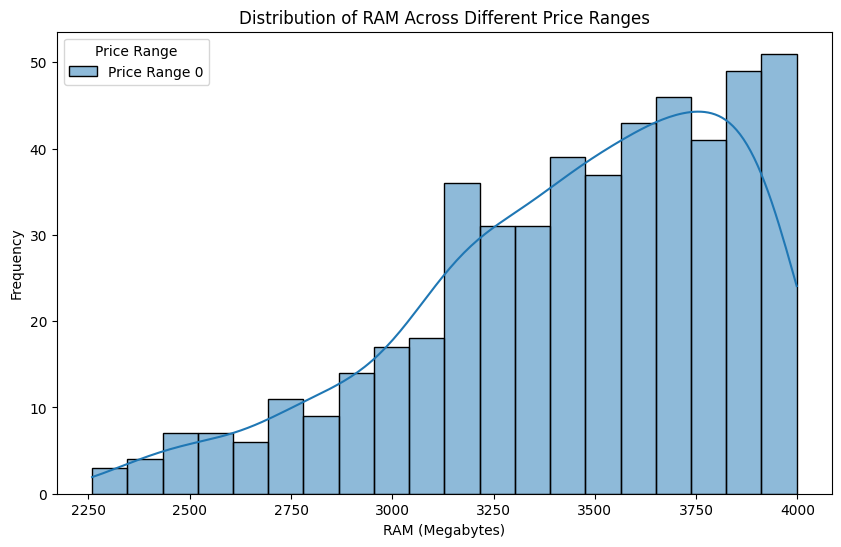

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
price_ranges = train_dataset['price_range'].unique()
# Plot distribution of RAM across different price ranges
plt.figure(figsize=(10, 6))

#for price_range in price_ranges:
# sns.histplot(train_dataset[train_dataset['price_range'] == price_range]['ram'], bins=20, kde=True, label=f'Price Range {price_range}')

sns.histplot(train_dataset[train_dataset['price_range'] == 3]['ram'], bins=20, kde=True, label=f'Price Range {0}')
plt.title('Distribution of RAM Across Different Price Ranges')
plt.xlabel('RAM (Megabytes)')
plt.ylabel('Frequency')
plt.legend(title='Price Range')
plt.show()


As we know that the target column (price_range) consists of four classes { 0:low cost, 1:medium cost, 2:high cost, 3:very high cost}
so here we check the data is balanced or not

<ipython-input-42-c9ee7e298e0e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_dataset, x='price_range', palette='viridis')


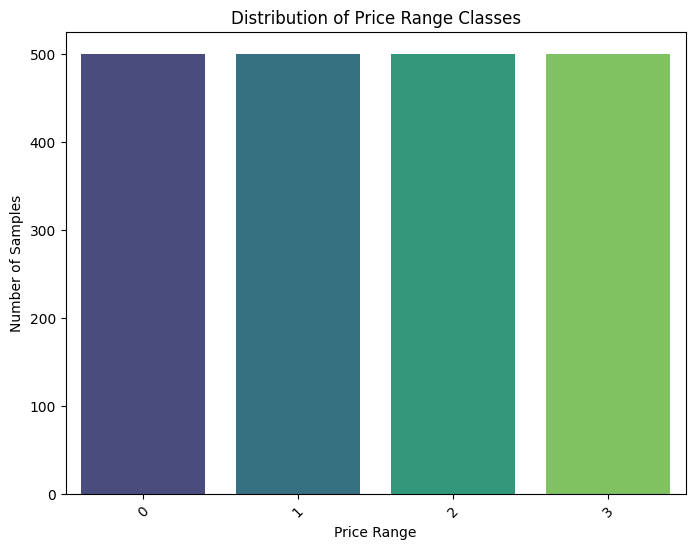

Counts of samples in each price range class:
price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


In [ ]:
# Count the number of samples in each price range class
price_range_counts = train_dataset['price_range'].value_counts()

# Plot the distribution of price range classes
plt.figure(figsize=(8, 6))
sns.countplot(data=train_dataset, x='price_range', palette='viridis')
plt.title('Distribution of Price Range Classes')
plt.xlabel('Price Range')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()

# Print the counts of samples in each price range class
print("Counts of samples in each price range class:")
print(price_range_counts)


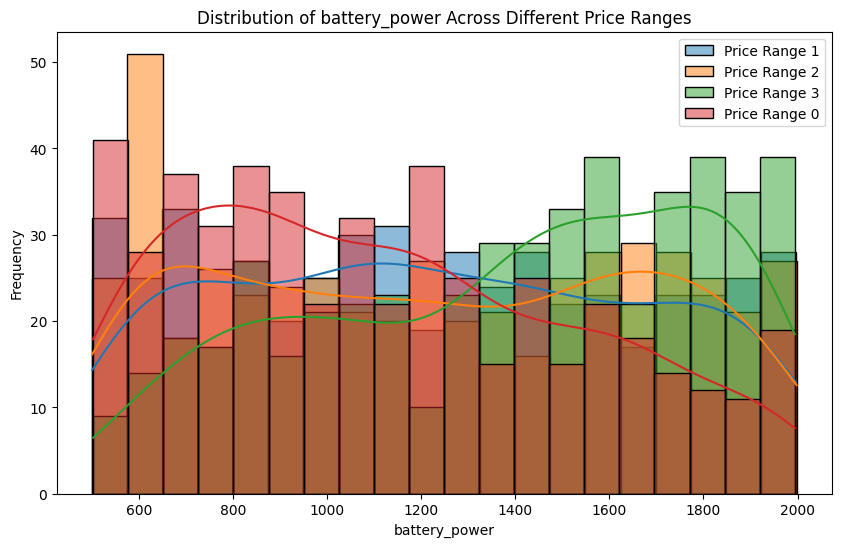

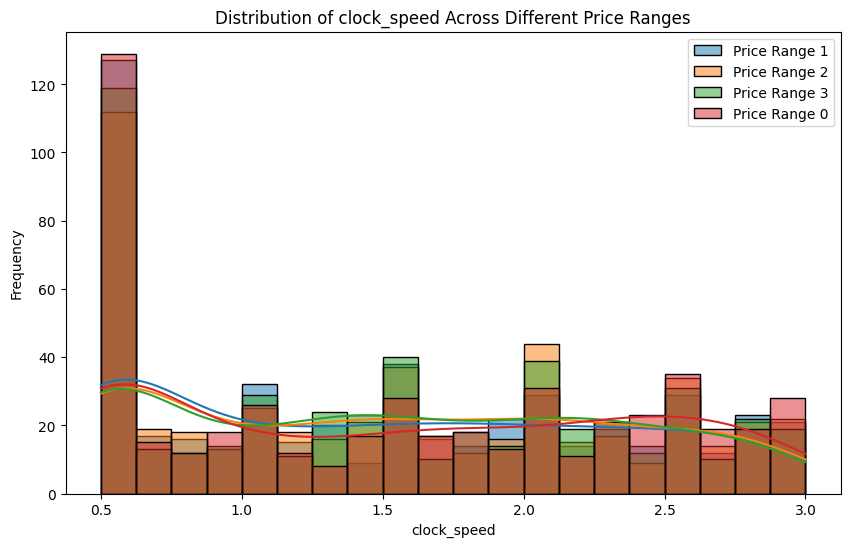

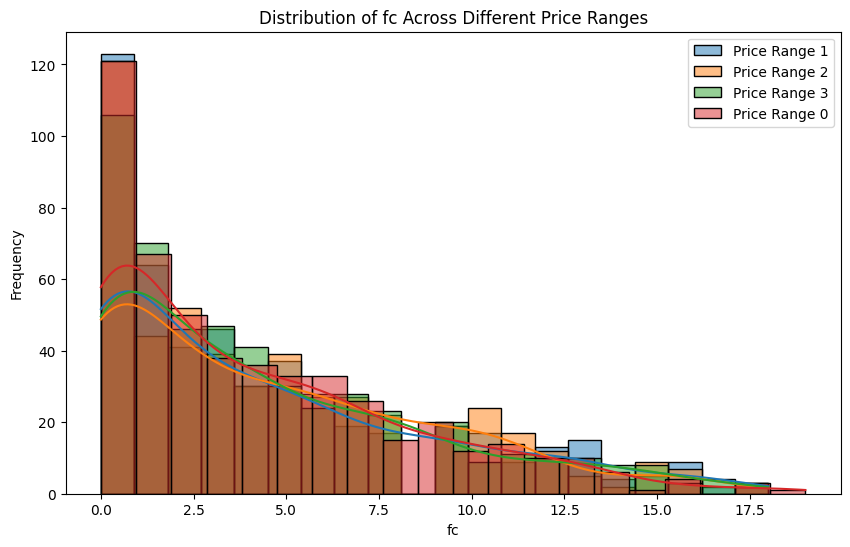

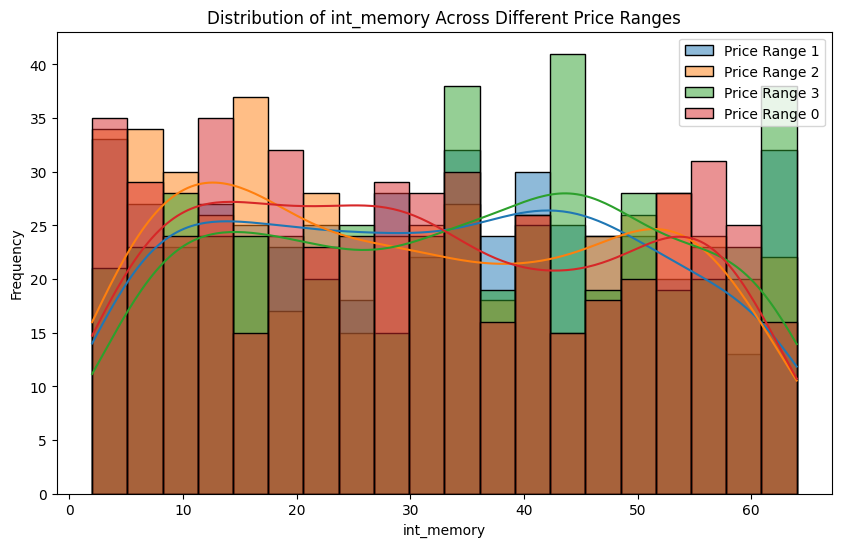

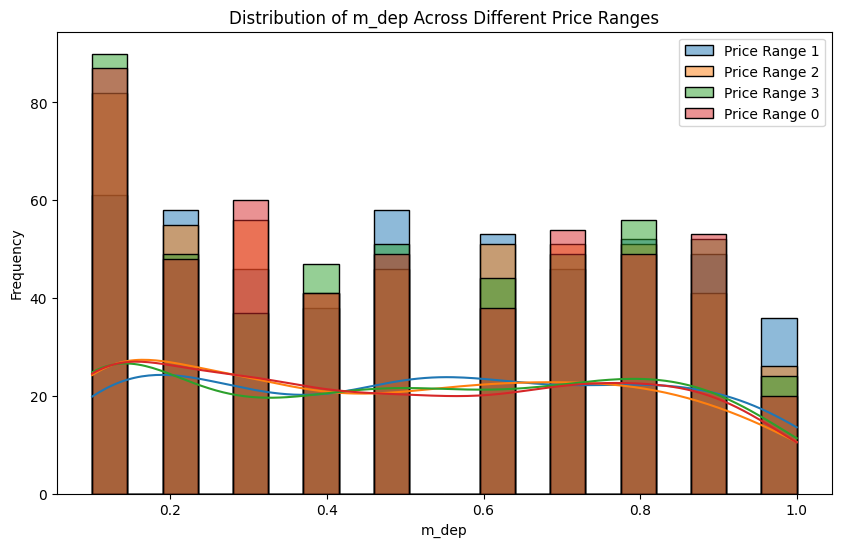

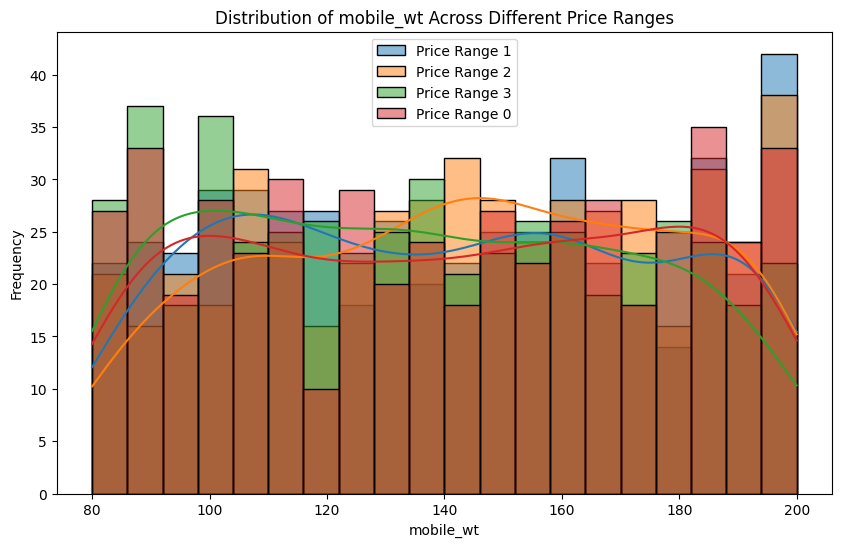

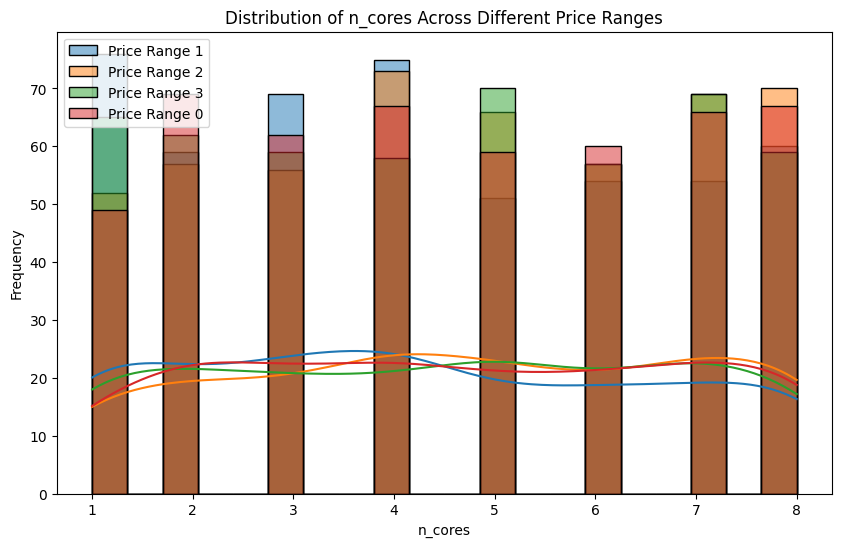

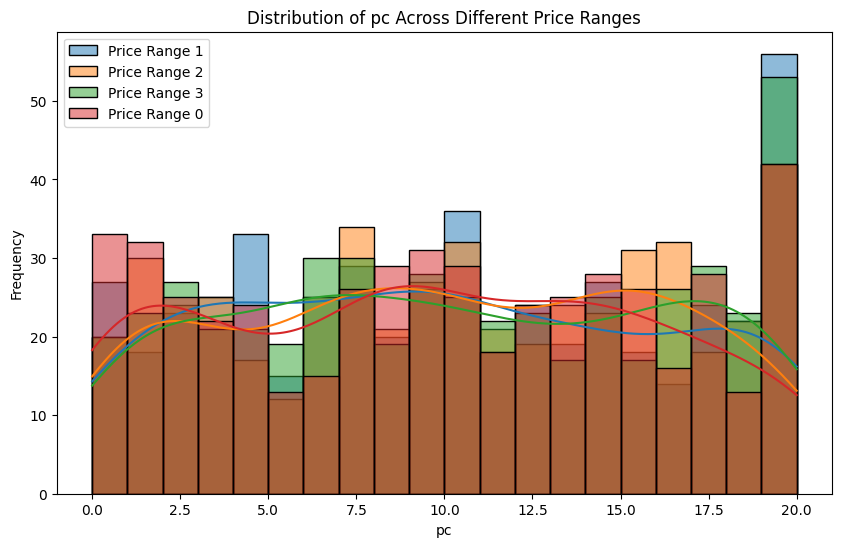

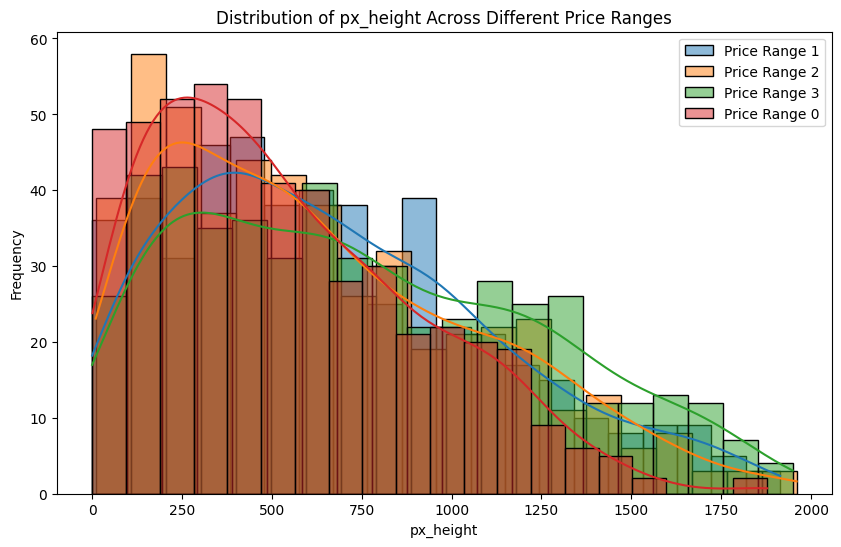

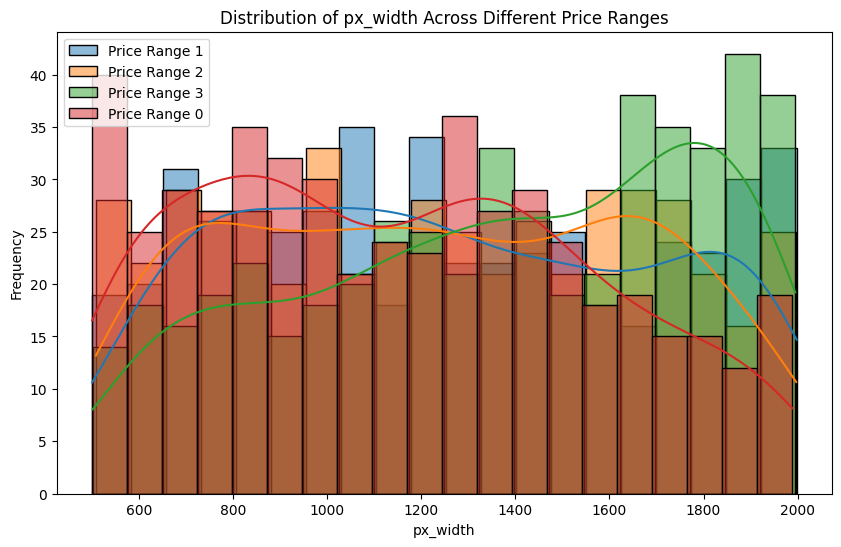

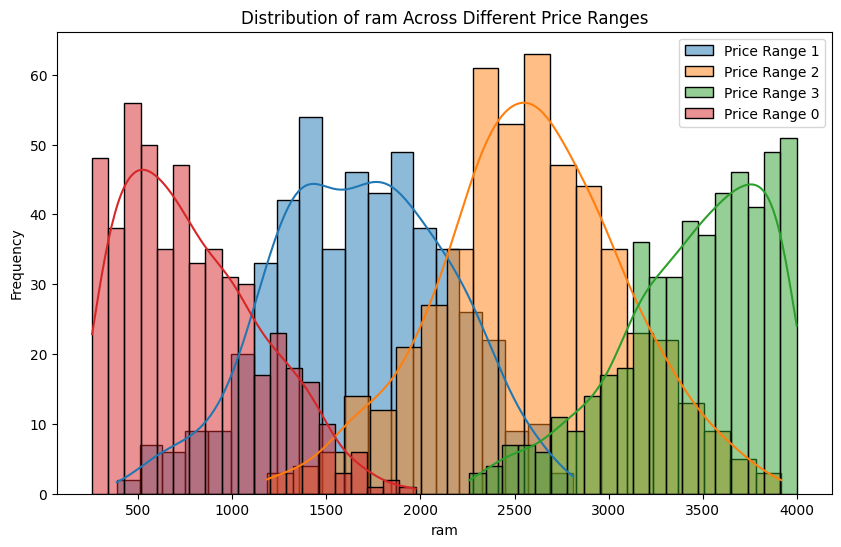

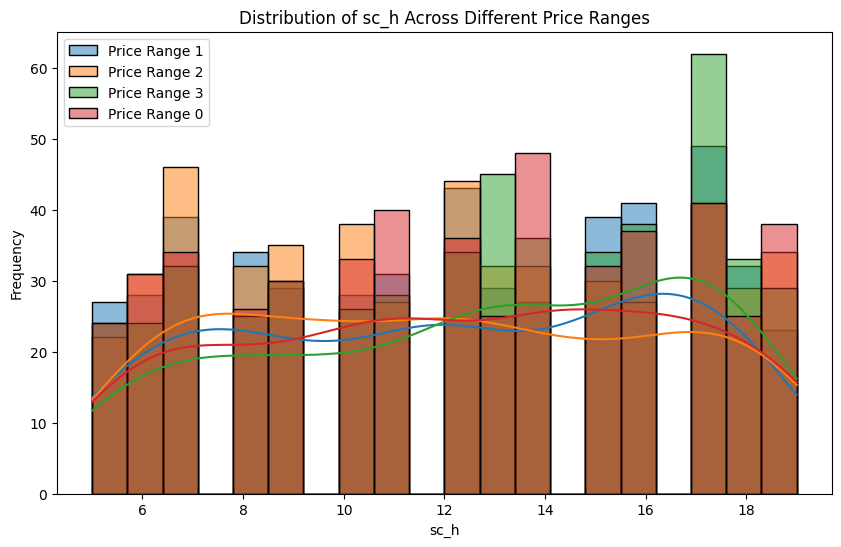

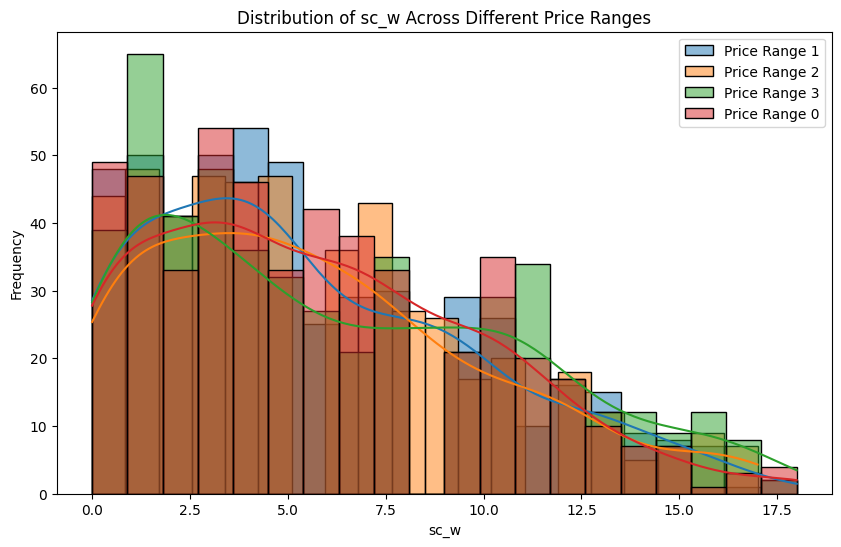

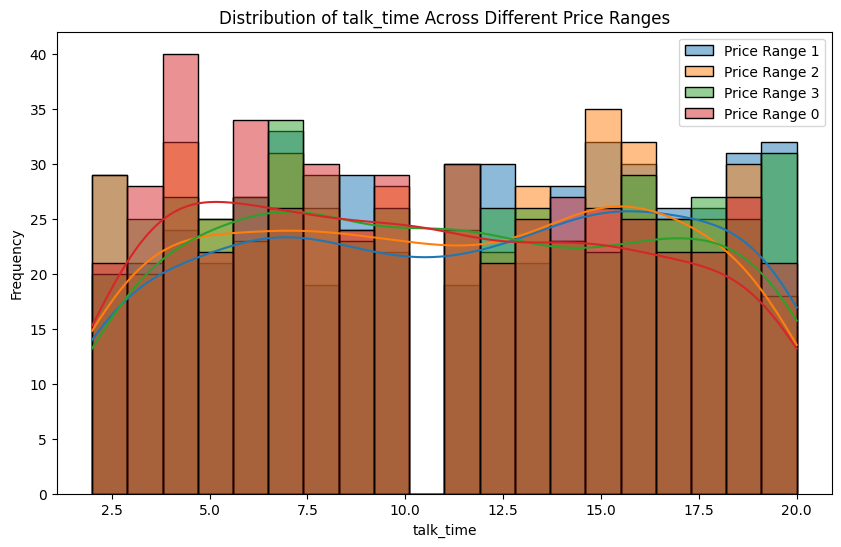

In [ ]:
# Plot distribution of features across different price ranges
features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
price_ranges = train_dataset['price_range'].unique()

for feature in features:
    plt.figure(figsize=(10, 6))
    for price_range in price_ranges:
        sns.histplot(train_dataset[train_dataset['price_range'] == price_range][feature], bins=20, kde=True, label=f'Price Range {price_range}')
    plt.title(f'Distribution of {feature} Across Different Price Ranges')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


# **Model**

In [ ]:
X=train_dataset_filtered.drop(['price_range'],axis=1,inplace=False)
#X=FeatureScalling(X)
min_max=MinMaxScaler()
X=min_max.fit_transform(X)

#pca=PCA(n_components=16)
#X=pca.fit_transform(X)

y=train_dataset_filtered['price_range']#label
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [ ]:
X=train_dataset_filtered.drop(["price_range"],axis=1)
X=FeatureScalling(X)
y=train_dataset_filtered["price_range"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [ ]:
print("size of trining examples:  "+str(len(y_train)))
print("size of dev examples:  "+str(len(y_test)))

size of trining examples:  1400
size of dev examples:  600


In [ ]:
rf,preds=random_forest(X_train,y_train,X_test,y_test)

Accuracy : 0.8816666666666667


In [ ]:
# Create an instance of CatBoostClassifier with regularization parameters
model = CatBoostClassifier(
    iterations=1000 ,
    learning_rate=0.1,
    l2_leaf_reg=0,  # Set the L2 regularization strength
    depth=6
)

# Train the model
model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=False)

# Make predictions
train_preds=model.predict(X_train)
print('train Accuracy :', metrics.accuracy_score(y_train, train_preds))
val_preds=model.predict(X_test)
print('test Accuracy :', metrics.accuracy_score(y_test, val_preds))

train Accuracy : 1.0
test Accuracy : 0.935


In [ ]:
with open('min_max', 'wb') as files:
    pickle.dump(min_max, files)

In [ ]:
with open('cat_model', 'wb') as files:
    pickle.dump(model, files)